In [5]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams

In [6]:
from sklearn.datasets import load_boston
boston = load_boston()

In [7]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [8]:
print(boston.data.shape)

(506, 13)


In [9]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [10]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [11]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
bos.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
dtype: object

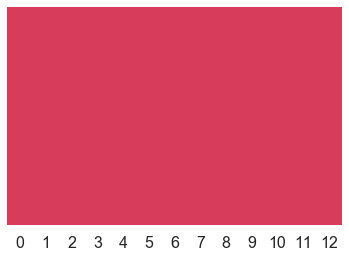

In [13]:
sns.heatmap(bos.isnull(),yticklabels=False,cbar=False,cmap=sns.diverging_palette( 365 , 1 , as_cmap = True ))

In [14]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
boston.target.shape

(506,)

In [16]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#Investing factors
It seems the outliers based on the prices are at the lower and higher prices.  
Also, it seems like they are highly correlated to the 'Non-Retail Businesses', the 'No. of Rooms' Variables, 
the 'Pupil-Teacher Ratio' and the percentage of 'Lower Status' in town. It seems education and perceived status in the area 
are negatively correlated to the price whereas the practical space and work availability are positively correlated in this study.

In [17]:
cmap = sns.diverging_palette( 200 , 1 , as_cmap = True )
corr = bos.corr()
corr.style.background_gradient()
# RAD & TAX is the closest correlated variables.
# INDUS, RM, PTRATIO, LSTAT is highest correlated to price.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1,-0.199458,0.404471,-0.0552953,0.417521,-0.21994,0.350784,-0.377904,0.622029,0.579564,0.28825,-0.377365,0.45222,-0.385832
ZN,-0.199458,1,-0.533828,-0.0426967,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.17552,-0.412995,0.360445
INDUS,0.404471,-0.533828,1,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.72076,0.383248,-0.356977,0.6038,-0.483725
CHAS,-0.0552953,-0.0426967,0.062938,1,0.0912028,0.0912512,0.0865178,-0.0991758,-0.00736824,-0.0355865,-0.121515,0.0487885,-0.0539293,0.17526
NOX,0.417521,-0.516604,0.763651,0.0912028,1,-0.302188,0.73147,-0.76923,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.21994,0.311991,-0.391676,0.0912512,-0.302188,1,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.69536
AGE,0.350784,-0.569537,0.644779,0.0865178,0.73147,-0.240265,1,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.0991758,-0.76923,0.205246,-0.747881,1,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.00736824,0.611441,-0.209847,0.456022,-0.494588,1,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.72076,-0.0355865,0.668023,-0.292048,0.506456,-0.534432,0.910228,1,0.460853,-0.441808,0.543993,-0.468536


In [18]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [19]:
bos.select_dtypes(exclude=['object']).isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [20]:
X = bos.drop(['PRICE'], axis=1)
Y = bos['PRICE']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 10)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

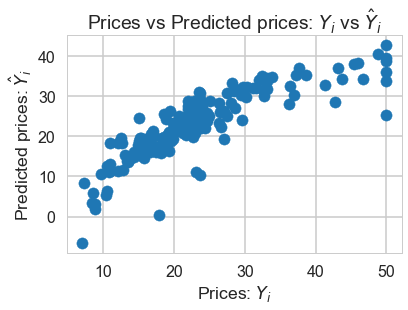

In [21]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

Drop outliers or keep outliers,
separate into two dataset then try and see why they are as such
Depends on the modelling - 
a. Multiple Variable, can get a better accuracy. Cos they are noisy.
b. Decision Tree=> Robust, can keep the outliers in ==>global_model
c. lasso, ridge = a linear regression might be a bit skewed.
d. distance based model = KNN
top 1-10% & 90-99% ==> if normal distribution then can take away the outliers.

-print the dot diagram

In [22]:
def percentile_based_outlier(df, data, threshold=94):
    diff = (100 - threshold) / 2.0
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return df[(data < minval) | (data > maxval)]

bos1=percentile_based_outlier(bos,bos['PRICE'])
display(bos1.head())
print(len(bos1))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
161,1.46336,0.0,19.58,0.0,0.605,7.489,90.8,1.9709,5.0,403.0,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1.0,0.605,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1.0,0.605,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0.0,0.605,7.929,96.2,2.0459,5.0,403.0,14.7,369.30,3.70,50.0
186,0.05602,0.0,2.46,0.0,0.488,7.831,53.6,3.1992,3.0,193.0,17.8,392.63,4.45,50.0


32


In [23]:
from sklearn.metrics import r2_score

print(r2_score(Y_test, Y_pred))
print(lm.score(X_test, Y_test))

#https://stackoverflow.com/questions/44682307/using-decision-tree-regression-and-cross-validation-in-sklearn

0.7162008132726885
0.7162008132726885


In [24]:
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print(mse)

27.13169192149798


In [25]:
A = bos1[['TAX', 'RM', 'PTRATIO', 'LSTAT']]
B = bos1['PRICE']

A_train, A_test, B_train, B_test = train_test_split(A, B, test_size = 0.33, random_state = 5)
print(A_train.shape)
print(A_test.shape)
print(B_train.shape)
print(B_test.shape)

(21, 4)
(11, 4)
(21,)
(11,)


In [98]:
lm = LinearRegression()
lm.fit(A_train, B_train)

B_pred = lm.predict(A_test)

plt.scatter(B_test, B_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

(11,)

In [27]:
cmap = sns.diverging_palette( 200 , 1 , as_cmap = True )
corr = bos1.corr()
corr.style.background_gradient()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1,-0.286813,0.275128,-0.250565,0.546536,-0.582199,0.388315,-0.362215,0.609194,0.499655,0.504162,-0.182716,0.605195,-0.622779
ZN,-0.286813,1,-0.713795,0.101546,-0.780504,0.425893,-0.884336,0.918234,-0.489639,-0.635284,-0.580001,0.209732,-0.378533,0.368173
INDUS,0.275128,-0.713795,1,0.0132351,0.708314,-0.659488,0.821176,-0.756335,0.442018,0.833452,0.631578,-0.235891,0.4938,-0.522447
CHAS,-0.250565,0.101546,0.0132351,1,-0.194361,0.262932,-0.057099,0.0688902,-0.111045,-0.114024,-0.189524,0.23355,-0.471336,0.48007
NOX,0.546536,-0.780504,0.708314,-0.194361,1,-0.641389,0.812037,-0.882731,0.77494,0.822683,0.675954,-0.396024,0.680348,-0.671288
RM,-0.582199,0.425893,-0.659488,0.262932,-0.641389,1,-0.520924,0.540523,-0.687344,-0.85821,-0.832652,0.236406,-0.7518,0.716807
AGE,0.388315,-0.884336,0.821176,-0.057099,0.812037,-0.520924,1,-0.927028,0.538633,0.739604,0.570134,-0.161924,0.396149,-0.400456
DIS,-0.362215,0.918234,-0.756335,0.0688902,-0.882731,0.540523,-0.927028,1,-0.632949,-0.759348,-0.627398,0.163129,-0.412439,0.389486
RAD,0.609194,-0.489639,0.442018,-0.111045,0.77494,-0.687344,0.538633,-0.632949,1,0.816536,0.831872,-0.378974,0.579172,-0.566091
TAX,0.499655,-0.635284,0.833452,-0.114024,0.822683,-0.85821,0.739604,-0.759348,0.816536,1,0.9072,-0.36494,0.695224,-0.703064


In [28]:
from sklearn.metrics import r2_score

print(r2_score(B_test, lm.predict(A_test)))
print(lm.score(A_test,B_test))

0.9089470753733668
0.9089470753733668


In [29]:
mse = sklearn.metrics.mean_squared_error(B_test, B_pred)
print(mse)

39.13703026610765


#Investing factors
It seems the outliers based on the prices are at the lower and higher prices.  
Also, it seems like they are highly correlated to the 'No. of Rooms' variables is positively correlated. Whilst the 'Pupil Teacher Ratio', 'Lower Status' and 'Tax' is negatively correlated for the boston pricing. So it seems that the tax and the charles river dummy variable depending on the flooding will affect the housing prices and create the anomalies.

Test the impure leaf nodes and do a correlation between the different variables RM, ZN, B, CR.
Use it to predict the next y scores.

!pip install GraphViz

In [31]:
from sklearn.externals.six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pydot
from graphviz import Source

dot_data = StringIO()
graph=export_graphviz(dt_fit, out_file='boston_housing_tree.dot', max_depth=None, feature_names=None, 
                             class_names=None, label='all', filled=False, leaves_parallel=2, 
                             impurity=True, node_ids=True, proportion=10, rotate=False, 
                             rounded=False, special_characters=False, precision=1)


In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
dt_fit = regressor.fit(X_train, Y_train)
print(dt_fit)
cross_val_score(regressor, boston.data, boston.target, cv=10)

dt_predict = regressor.predict(X_test).astype('int')
dt_predict = np.array(dt_predict)
print(dt_predict)

print(r2_score(Y_test, dt_predict))

b#http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')
[22 24 23 28 21 14 42 15 23 48 21 29 25 32 32 50 29 19 24 19 31 16 20 29
 34 18 18 13 43 17 33 31 24 24 15 18  7 34 25 22 42 24  7 24 21 26 21 21
 50 14 19 16 21 50 26 31 21 21 22 17 19 20 50 50 29 18 25 10 28 35 17 24
 19 50 23 17 44  7 19 31 19 23 19 22 30 30 22 32 24  5 24 16 22 23 20 18
 22 22 18 19 22 16 19 21 15 20 19 15 26 18 10 21 20 29 21 10 14 20 13 24
 17 34 22 11 17 23 23 19 20 33 22  5 32 28 17 29 24 34 10  5 28  8 16 21
  5 17 39 23 21 20 11 18 50 19 19 21 22  8 13 23  8 13 16 16 24 20 24]
0.7866498055468838


Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

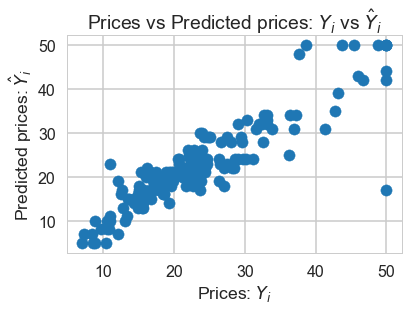

In [103]:
plt.scatter(Y_test, dt_predict)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

Dataset Reference:
http://lib.stat.cmu.edu/datasets/boston